## Social Network Analysis
#### Target : @infoJakarta
#### Word Keys : Vaksin or Covid
#### Time Before : 2020/08/01 - 2021/01/31
#### Time After : 2020/02/01 - now

- Import package yang digunakan untuk scrapping data tweet dari sebuah akun menggunakan ___twint___

In [1]:
import os
!pip install twint
!pip uninstall twint -y
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint/
!pip3 install . -r requirements.txt
%cd ..

     |████████████████████████████████| 1.3MB 6.8MB/s 
     |████████████████████████████████| 266kB 23.8MB/s 
     |████████████████████████████████| 358kB 38.6MB/s 
     |████████████████████████████████| 143kB 32.3MB/s 
     |████████████████████████████████| 296kB 38.4MB/s 
     |████████████████████████████████| 296kB 38.7MB/s 
  Created wheel for twint: filename=twint-2.1.20-cp37-none-any.whl size=33929 sha256=6e6fb6c359b318266ba53f1ba9c113090f7767c126097b74585694b20d25d8ca
  Stored in directory: /root/.cache/pip/wheels/66/25/c7/855c1d896087ef84df6e6713b8adb073aff99af119450e1e4f
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13501 sha256=b74db51e88cd4a4b68b9e054021bd8ddd359d756fcff4857c7a4f3629f79a400
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for googletransx: filename=googletransx-2.4.2-cp37-none-any.whl size=15970 sha256=2c86fdc6628f79eda7fc1c12e9b20c4e6f0

In [4]:
import twint
import nest_asyncio
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

nest_asyncio.apply()

* Memasukkan folder infojakarta yang nanti kita akan jadikan folder penyimpanan data yang ada

In [2]:
!unzip infojakarta.zip

Archive:  infojakarta.zip
   creating: infojakarta/


- Scrapping data tweet dari akun infoJakarta dengan kata kunci covid dan vaksin dan disimpang di file before.json 

### BEFORE

In [5]:
c = twint.Config()
c.Username = 'infoJakarta'
c.Since = "2020-08-01" #batas awal tanggal pengambilan tweet
c.Until = "2021-01-31" #batas akhir tanggal pengambilan tweet
c.Count = True         
c.Retweets = True
c.Stats = True 
c.Show_hashtags = True
c.Hide_output = True
c.Profile_full = True
c.Store_json = True
for key in ['vaksin', 'covid']:
    c.Search = key
    c.Output = './infojakarta/before.json' # save to json
    twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 8 Tweets from @infoJakarta.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 12 Tweets from @infoJakarta.


### AFTER

In [29]:
c = twint.Config()
c.Username = 'infoJakarta'
c.Since = "2021-02-01" #batas awal tanggal pengambilan tweet
c.Count = True         
c.Retweets = True
c.Stats = True 
c.Show_hashtags = True
c.Hide_output = True
c.Profile_full = True
c.Store_json = True
for key in ['vaksin', 'covid']:
    c.Search = key
    c.Output = './infojakarta/after.json' # save to json
    twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 11 Tweets from @infoJakarta.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 19 Tweets from @infoJakarta.


- Import package untuk scrapping menggunakan ___selenium___
- Mendefinisikan sebuah fungsi __get_list_replies__ dengan struktur:
    - Membuka link tweet yang didapat melalui ___twint___ sebelumnya 
    - Mengambil semua user yang me-reply dari tweet_id tersebut di dalam container tweet
    - Diambil dengan prefix string terdapat simbol '@' karena saat scrapping, tanggal tweet akan ikut terindikasi

In [7]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome('chromedriver',options=options)
wd.get("https://www.website.com")
print(wd.page_source)  # results

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [61.8 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:13 https://developer.download.nvi

In [8]:
from getpass import getpass
from time import sleep
from selenium.webdriver.common.keys import Keys
# from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
import numpy as np
from datetime import datetime, timedelta

In [10]:
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs",prefs)
# chrome_options.add_argument('headless') # untuk menutup browser

#specify the path to chromedriver.exe
driver=webdriver.Chrome('chromedriver',options=options)

In [11]:
driver.get('https://www.twitter.com/login')
sleep(2)

username = driver.find_element_by_xpath('//input[@name="session[username_or_email]"]')
username.send_keys('cvhangkyun') # Ubah username sesuai akun pribadi

my_password = getpass()

password = driver.find_element_by_xpath('//input[@name="session[password]"]')
password.send_keys(my_password)
password.send_keys(Keys.RETURN)

··········


In [12]:
fail_links = []
def get_list_replies(link):
    list_replies = []
    driver.get(link)
    sleep(2)
    
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(2)
    
    try:
        replies_container = driver.find_element_by_xpath('//div[@aria-label="Timeline: Conversation"]')
        if replies_container:
            replies = replies_container.find_elements_by_xpath('.//div[@dir="ltr"]/span')
            for reply in replies:
                if reply.text[0] == '@':
                    list_replies.append(reply.text)
                else:
                    continue
    except:
        print(list_replies)
        if not list_replies:
            fail_links.append(link)
        return list_replies
    print(list_replies)
    if not list_replies:
            fail_links.append(link)
    return list_replies

### SCRAPPING BEFORE DATA
- Load file yang telah disimpan dari twint, supaya program tidak harus berjalan dari awal lagi
- Mengambil beberapa kolom dengan informasi yang dibutuhkan saja kolom tersebut yaitu :
    - ['id', 'conversation_id', 'user_id', 'username', 'name','tweet','replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url','user_rt_id', 'user_rt', 'retweet_id', 'reply_to']
- Setelah itu dicheck apakah terdapat tweet yang sama yang tersimpan dari twint, jika ada maka akan di-drop salah satu

In [13]:
df_before = pd.read_json('./infojakarta/before.json' , lines = True)
export_before = df_before.to_csv('./infojakarta/before.csv', index = None, header=True)

In [14]:
# df_before.duplicated()
df_before = df_before[['id', 'conversation_id', 'user_id', 'username', 'name','tweet','replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url','user_rt_id', 'user_rt', 'retweet_id', 'reply_to']]

df_before = df_before.drop_duplicates(subset='link')
for i in df_before['link']:
    print(i)

https://twitter.com/infojakarta/status/1347527216444280834
https://twitter.com/infojakarta/status/1339812480646713346
https://twitter.com/infojakarta/status/1338462339717206017
https://twitter.com/infojakarta/status/1335764645575999491
https://twitter.com/infojakarta/status/1315506327037255686
https://twitter.com/infojakarta/status/1312597076631379968
https://twitter.com/infojakarta/status/1312594789531967488
https://twitter.com/infojakarta/status/1309744309516693516
https://twitter.com/infojakarta/status/1346683958440783873
https://twitter.com/infojakarta/status/1343594476862771200
https://twitter.com/infojakarta/status/1333619800669642754
https://twitter.com/infojakarta/status/1315498561568608257
https://twitter.com/infojakarta/status/1314716813431717890
https://twitter.com/infojakarta/status/1311665776277942273
https://twitter.com/infojakarta/status/1305856507427401728
https://twitter.com/infojakarta/status/1305726407155146752


In [15]:
data_tweets_before = df_before

- Iterasi row setiap row dari dataframe
- setelah itu menggunakan fungsi __get_list_replis__ yang telah didefinisikan dengan kolom __link__ pada setiap row
- hasil dari __get_list_replies__ dipush ke sebuah array kosong
- saat iterasi row selesai, maka array yang berisikan user yang reply pada setiap link tweet di assign ke dataframe dengan kolom __list_replies__
- setelah itu, karena scrapping menggunakan selenium memakan waktu yang panjang, supaya data dapat digunakan tanpa menjalankan __get_list_replies__, dataframe disimpan ke sebuah file __before_replies.json__

In [16]:
arr_temp = []
for i, row in data_tweets_before.iterrows():
     arr_temp.append(get_list_replies(row['link']))

data_tweets_before['list_replies'] = arr_temp
data_tweets_before['list_replies']

['@infojakarta', '@PutraWilson']
['@infojakarta']
['@infojakarta', '@rakaadtya21', '@edhsetia', '@cillresdy', '@ajfrm_', '@seokaim', '@riskawindayln', '@rahadianmunawir', '@chernobyl_9', '@aldinohendrwn', '@Wicaksono_sini', '@mlvyou', '@ketekniall', '@JAmsterdam7', '@RedV157', '@panikpanikk', '@Rizky_Gendon', '@spearmintybebe', '@Indah83015452', '@NovalSyawal', '@bangopang_', '@SirHarriss', '@SuryadiRahmat8', '@irfanharja', '@outtaanxiety', '@fourryilly']
['@infojakarta', '@infojakarta', '@lyfes_hit', '@sikanseu', '@Rizky_Gendon', '@yusamhr']
['@infojakarta', '@RemajaKolonial', '@Arie_16', '@cillresdy', '@Arie_16', '@teyeng37', '@Maxgirl13', '@babyoil008', '@christofer_bhp', '@rinihaphap', '@okkyjoeamstrong', '@Vinaagy', '@adamsnasution23', '@babangbetawie', '@Agus1892', '@WithOneWithYou', '@devicut', '@febri_aku', '@diiiaaannnP', '@Andreassgs', '@BintCeo', '@WibowoLukito', '@prasthialdrii', '@herry28290', '@MisterClown8']
['@infojakarta', '@Arie_16', '@krishnayana95', '@Roy78356844', 

0                          [@infojakarta, @PutraWilson]
1                                        [@infojakarta]
2     [@infojakarta, @rakaadtya21, @edhsetia, @cillr...
3     [@infojakarta, @infojakarta, @lyfes_hit, @sika...
4     [@infojakarta, @RemajaKolonial, @Arie_16, @cil...
5     [@infojakarta, @Arie_16, @krishnayana95, @Roy7...
6     [@infojakarta, @KompasTV, @Luthfi25283385, @ju...
7                             [@infojakarta, @dedeham_]
8     [@infojakarta, @a9ul, @tibylin, @kammenrider_,...
9     [@infojakarta, @eckaNh57, @vieniviedivieci, @k...
12    [@infojakarta, @infojakarta, @tukangnasiulam, ...
14    [@infojakarta, @ninanenen, @andinitiwie, @fara...
15    [@infojakarta, @KontanNews, @AisahNH15, @sabir...
17    [@infojakarta, @iqbalfarisy, @RaswithaM, @eru_...
18    [@infojakarta, @infojakarta, @siswandibambang,...
19    [@infojakarta, @augustbudyanto, @gadamasalah, ...
Name: list_replies, dtype: object

In [17]:
data_tweets_before.to_json('./infojakarta/before_replies.json')
data_tweets_before.to_csv('./infojakarta/before_replies.csv')

- Load file __before_replies.json__
- Setelah itu, dari user - user yang reply pada kolom __list_replies__ digabungkan menjadi satu dan memilih yang masih belum ada di tweet sebelumnya
- Akan ada akun twitter besar yang akan terindikasi pada __list_replies__ karena tweet tersebut berasal dari retweet dari sebuah akun besar. 
- Dalam hal ini akan didrop supaya dapat mengetahui hanya dari user personal
- Akun besar tersebut antara lain __@KontanNews__ dan __@KomppasTV__

In [18]:
data_tweets_before = pd.read_json('./infojakarta/before_replies.json')
data_tweets_before

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
0,1347527216444280834,1347527216444280832,106038219,infojakarta,@InfoJakarta,Vaksin Sinovac.. Halal. https://t.co/RSc3G6lRXr,3,6,17,[],[],https://twitter.com/infojakarta/status/1347527...,False,,,,,[],"[@infojakarta, @PutraWilson]"
1,1339812480646713346,1339812480646713344,106038219,infojakarta,@InfoJakarta,"Program vaksin gratis, estimasi anggaran yang ...",0,0,1,[],[],https://twitter.com/infojakarta/status/1339812...,False,,,,,[],[@infojakarta]
2,1338462339717206017,1338462339717206016,106038219,infojakarta,@InfoJakarta,Harga vaksin Covid-19. https://t.co/taKxMdi15q,81,322,613,[],[],https://twitter.com/infojakarta/status/1338462...,False,,,,,[],"[@infojakarta, @rakaadtya21, @edhsetia, @cillr..."
3,1335764645575999491,1335764645575999488,106038219,infojakarta,@InfoJakarta,"Breaking News. 1,2 Juta Vaksin Covid 19 sudah...",9,8,23,[],[],https://twitter.com/infojakarta/status/1335764...,False,,,,,[],"[@infojakarta, @infojakarta, @lyfes_hit, @sika..."
4,1315506327037255686,1315506327037255680,106038219,infojakarta,@InfoJakarta,Bye Covid ! Pemerintah memastikan program vak...,30,33,57,[],[],https://twitter.com/infojakarta/status/1315506...,False,,,,,[],"[@infojakarta, @RemajaKolonial, @Arie_16, @cil..."
5,1312597076631379968,1312597076631379968,106038219,infojakarta,@InfoJakarta,Apa yang akan Anda lakukan apabila Vaksin Covi...,9,3,3,[infojakartapolling],[],https://twitter.com/infojakarta/status/1312597...,False,,,,,[],"[@infojakarta, @Arie_16, @krishnayana95, @Roy7..."
6,1312594789531967488,1312594789531967488,106038219,infojakarta,@InfoJakarta,Tidak masalah apabila Vaksin Tidak Halal.,10,5,11,[],[],https://twitter.com/infojakarta/status/1312594...,False,https://twitter.com/KompasTV/status/1312218071...,,,,[],"[@infojakarta, @KompasTV, @Luthfi25283385, @ju..."
7,1309744309516693516,1309744309516693504,106038219,infojakarta,@InfoJakarta,Bertahan. Sampai vaksin tiba. #vaccinerace #CO...,2,36,25,"[vaccinerace, covidー19]",[],https://twitter.com/infojakarta/status/1309744...,False,,,,,[],"[@infojakarta, @dedeham_]"
8,1346683958440783873,1346683958440783872,106038219,infojakarta,@InfoJakarta,Kasus Covid terus meningkat. Perlukah PSBB ket...,53,2,45,[],[],https://twitter.com/infojakarta/status/1346683...,False,,,,,[],"[@infojakarta, @a9ul, @tibylin, @kammenrider_,..."
9,1343594476862771200,1343594476862771200,106038219,infojakarta,@InfoJakarta,"Muncul Varian Baru Covid 19, RI Tutup Akses Ma...",7,3,18,[],[],https://twitter.com/infojakarta/status/1343594...,False,,,,,[],"[@infojakarta, @eckaNh57, @vieniviedivieci, @k..."


In [20]:
arr = []
for i in data_tweets_before['list_replies']:
    for x in i:
        arr.append(x)
arr = list(set(arr))

prefix = '@'
arr = [i for i in arr if prefix in i]
arr = list(set(arr))
arr.remove('@infojakarta')
arr.remove('@KontanNews')
arr.remove('@KompasTV')
print(len(arr))
arr

121


['@andita711',
 '@e_gabagus',
 '@aldinohendrwn',
 '@willmana8',
 '@edhsetia',
 '@dedeham_',
 '@KEBSIBEB',
 '@meuthiaariefia1',
 '@AisahNH15',
 '@panikpanikk',
 '@PutraWilson',
 '@WibowoLukito',
 '@eckaNh57',
 '@arielutte11',
 '@eru_joo_han',
 '@trisurjadi',
 '@Septiaraenii',
 '@PETERBOLOHO',
 '@spearmintybebe',
 '@Agus1892',
 '@fourryilly',
 '@Vinaagy',
 '@augustbudyanto',
 '@andinitiwie',
 '@kammenrider_',
 '@Wicaksono_sini',
 '@adamsnasution23',
 '@riskawindayln',
 '@naana1704',
 '@namelessdera',
 '@tukangnasiulam',
 '@christofer_bhp',
 '@sabirsultan69',
 '@be_dull',
 '@faraokha',
 '@febronie75',
 '@rakaadtya21',
 '@okkyjoeamstrong',
 '@Syaiful12258759',
 '@BintCeo',
 '@donidario_',
 '@Roy78356844',
 '@SirHarriss',
 '@outtaanxiety',
 '@MisterClown8',
 '@twitt_viant',
 '@a9ul',
 '@aLeGiggsy',
 '@chernobyl_9',
 '@herry28290',
 '@RaswithaM',
 '@Indah83015452',
 '@Andreassgs',
 '@febri_aku',
 '@cheflatarissa',
 '@yusamhr',
 '@vieniviedivieci',
 '@dhillaa_r',
 '@jenengkuroi',
 '@krishnaya

- Setelah mendapatkan user yang pernah reply scrapping menggunakan twint dengan konfigurasi seperti data __before__ 
- Scrapping dilakukan dalam for loop di setiap user yang telah didapat
- Dan melakukan hal yang sama seperti data __before__
- Output dari proses ini adalah __before_user_scrap.json__

In [21]:
filename = './infojakarta/before_user_data.json'
for uname in arr:
    uname = uname[1:]
    c = twint.Config()
    c.Username = uname
    c.Since = "2020-08-01" #batas awal tanggal pengambilan tweet
    c.Until = "2021-01-31" #batas akhir tanggal pengambilan tweet
    c.Search = "covid OR vaksin"
    c.Count = True         
    c.Retweets = True
    c.Stats = True 
    c.Show_hashtags = True
    c.Hide_output = True
    c.Profile_full = True
    c.Store_json = True
    c.Output = filename # save to json
    twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 1 Tweets from @andita711.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @e_gabagus.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @aldinohendrwn.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @willmana8.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 2 Tweets from @edhsetia.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 5 Tweets from @dedeham_.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 2 Tweets from @K

In [22]:
# Disimpan dalam bentuk csv

filename = './infojakarta/before_user_data.csv'
for uname in arr:
    uname = uname[1:]
    c = twint.Config()
    c.Username = uname
    c.Since = "2020-08-01" #batas awal tanggal pengambilan tweet
    c.Until = "2021-01-31" #batas akhir tanggal pengambilan tweet
    c.Search = "covid OR vaksin"
    c.Count = True         
    c.Retweets = True
    c.Stats = True 
    c.Show_hashtags = True
    c.Hide_output = True
    c.Profile_full = True
    c.Store_json = True
    c.Output = filename # save to csv
    twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 1 Tweets from @andita711.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @e_gabagus.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @aldinohendrwn.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @willmana8.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 2 Tweets from @edhsetia.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 5 Tweets from @dedeham_.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 2 Tweets from @K

In [23]:
before_user_data_tweets = pd.read_json('./infojakarta/before_user_data.json', lines = True)
before_user_data_tweets = before_user_data_tweets[['id', 'conversation_id', 'user_id', 'username', 'name','tweet','replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url','user_rt_id', 'user_rt', 'retweet_id', 'reply_to']]

before_user_data_tweets = before_user_data_tweets.drop_duplicates(subset='link')
for i in before_user_data_tweets['link']:
    print(i)

https://twitter.com/andita711/status/1353375819402383360
https://twitter.com/edhsetia/status/1333730213964836865
https://twitter.com/edhsetia/status/1312347911338950656
https://twitter.com/dedeham_/status/1351076847375814660
https://twitter.com/dedeham_/status/1339136691341152258
https://twitter.com/dedeham_/status/1336790440398352385
https://twitter.com/dedeham_/status/1322837082717384705
https://twitter.com/dedeham_/status/1309760675279851520
https://twitter.com/KEBSIBEB/status/1354681526693228544
https://twitter.com/KEBSIBEB/status/1349679994851581956
https://twitter.com/meuthiaariefia1/status/1341602683073937409
https://twitter.com/meuthiaariefia1/status/1341259493972164609
https://twitter.com/meuthiaariefia1/status/1340131653381865473
https://twitter.com/meuthiaariefia1/status/1339447612559134721
https://twitter.com/meuthiaariefia1/status/1339441103590715392
https://twitter.com/AisahNH15/status/1348821430465544193
https://twitter.com/AisahNH15/status/1335436336644247552
https://tw

In [24]:
arr_temp = []
for i, row in before_user_data_tweets.iterrows():
     arr_temp.append(get_list_replies(row['link']))

before_user_data_tweets['list_replies'] = arr_temp
before_user_data_tweets['list_replies']

['@andita711']
['@detikcom', '@edhsetia', '@svcka']
['@maulanandaa', '@edhsetia']
['@VIVAcoid', '@dedeham_']
['@dedeham_']
['@Inter_id', '@hendrabalink', '@dedeham_']
['@detikcom', '@dedeham_']
['@infojakarta', '@dedeham_']
['@KEBSIBEB']
['@KEBSIBEB']
['@meuthiaariefia1', '@detikHealth']
['@meuthiaariefia1']
['@meuthiaariefia1', '@OmDennis']
['@meuthiaariefia1', '@aniipuspita', '@meuthiaariefia1', '@meuthiaariefia1', '@aniipuspita']
['@fahrifary', '@fahrifary', '@meuthiaariefia1', '@fahrifary', '@meuthiaariefia1', '@selasapagi_']
['@aMrazing', '@AisahNH15']
['@sociotalker', '@sociotalker', '@sociotalker', '@AisahNH15', '@AisahNH15']
['@sociotalker', '@sociotalker', '@sociotalker', '@AisahNH15', '@AisahNH15']
['@catrescuedotid', '@AisahNH15', '@catrescuedotid']
['@PutraWilson', '@detikTravel']
['@ChndyFny', '@arielutte11', '@ChndyFny', '@arielutte11']
['@arielutte11']
['@arielutte11', '@arielutte11', '@arielutte11', '@arielutte11', '@arielutte11', '@arielutte11', '@arielutte11']
['@ferd

0                        [@andita711]
1      [@detikcom, @edhsetia, @svcka]
2           [@maulanandaa, @edhsetia]
3              [@VIVAcoid, @dedeham_]
4                         [@dedeham_]
                    ...              
410                        [@Riyo109]
411             [@detikcom, @Riyo109]
412          [@infojakarta, @Riyo109]
413              [@kumparan, @dwibbg]
414             [@MataNajwa, @dwibbg]
Name: list_replies, Length: 415, dtype: object

In [26]:
before_user_data_tweets.to_json('./infojakarta/before_user_scrap.json')
before_user_data_tweets.to_csv('./infojakarta/before_user_scrap.csv')

In [27]:
arr = []
for i in before_user_data_tweets['list_replies']:
    for x in i:
        arr.append(x)
arr = list(set(arr))

prefix = '@'
arr = [i for i in arr if prefix in i]
arr = list(set(arr))
# arr.remove('@infojakarta')
# arr.remove('@KontanNews')
# arr.remove('@KompasTV')
print(len(arr))
arr

335


['@dedeham_',
 '@vintenas',
 '@acmilan',
 '@PutraWilson',
 '@nikkoep',
 '@PutraWTF',
 '@mrshananto',
 '@eru_joo_han',
 '@katzen_jammer',
 '@PETERBOLOHO',
 '@anthony_yanuar',
 '@indosupporter',
 '@dirgarambe',
 '@hrdbacot',
 '@satya_nirwikara',
 '@mediaindonesia',
 '@Asad_Umar',
 '@KawalCOVID19',
 '@pkemarinsore',
 '@KontanNews',
 '@medcom_id',
 '@febronie75',
 '@MataNajwa',
 '@Rnfadillaa',
 '@Husen_Jafar',
 '@kompasiana',
 '@Andreassgs',
 '@gemaala',
 '@ENatkime',
 '@qronoz',
 '@Anono80845565',
 '@krishnayana95',
 '@Sesa_Opas',
 '@fahrifary',
 '@WatchmenID',
 '@AsadPawana',
 '@marselinarosali',
 '@komediangagal',
 '@ajfrm_',
 '@FunJunkies',
 '@WithOneWithYou',
 '@srasyh',
 '@NPR',
 '@dickyabay90',
 '@RemajaKolonial',
 '@KompasTravel',
 '@detikTravel',
 '@eradotid',
 '@frsp_',
 '@_haye_',
 '@lgonst',
 '@nerorisme',
 '@Rizky_Gendon',
 '@hidrobib',
 '@AbubakerKhalid',
 '@minie_centil',
 '@RT_com',
 '@FarezaHS',
 '@Yahoo_ID',
 '@sugarsweetnrr',
 '@kompascom',
 '@gabstevany',
 '@caturmaull'

### SCRAPPING AFTER DATA

In [30]:
df_after = pd.read_json('./infojakarta/after.json' , lines = True)
df_after = df_after[['id', 'conversation_id', 'user_id', 'username', 'name','tweet','replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url','user_rt_id', 'user_rt', 'retweet_id', 'reply_to']]

df_after = df_after.drop_duplicates(subset='link')
for i in df_after['link']:
    print(i)

https://twitter.com/infojakarta/status/1403930115579334662
https://twitter.com/infojakarta/status/1403907579227475973
https://twitter.com/infojakarta/status/1398237690433130497
https://twitter.com/infojakarta/status/1384215782289141767
https://twitter.com/infojakarta/status/1376929493814677504
https://twitter.com/infojakarta/status/1376883129890205696
https://twitter.com/infojakarta/status/1373529155304706054
https://twitter.com/infojakarta/status/1372218371442319360
https://twitter.com/infojakarta/status/1372150088248664068
https://twitter.com/infojakarta/status/1371706352549040133
https://twitter.com/infojakarta/status/1366579485793939456
https://twitter.com/infojakarta/status/1393711819387113477
https://twitter.com/infojakarta/status/1391453501339750400
https://twitter.com/infojakarta/status/1390146506250809346
https://twitter.com/infojakarta/status/1389260043678220289
https://twitter.com/infojakarta/status/1388323748697182208
https://twitter.com/infojakarta/status/13758667138797035

In [33]:
export_after = df_after.to_csv('./infojakarta/after.csv', index = None, header=True)
data_tweets_after = df_after

In [32]:
arr_temp = []
for i, row in data_tweets_after.iterrows():
     arr_temp.append(get_list_replies(row['link']))

data_tweets_after['list_replies'] = arr_temp
data_tweets_after['list_replies']

['@infojakarta', '@infojakarta', '@kleonygeertruid']
['@infojakarta', '@AbiNovian', '@infojakarta', '@AbiNovian']
['@BagusOfficial23', '@NnrsnL', '@KiloanSusahNaek', '@lalaahmad', '@listyo_gembong', '@Adi_Rahadian', '@gitagitch', '@246e0159066948e', '@yamibaezzy', '@SelvianaS', '@FemmyTamberonga', '@DpDuddyridwan', '@om_patilele', '@cubitski', '@shinta_p', '@mosidik', '@Hunter_RIco', '@RiyanMuharam']
['@infojakarta', '@dinkesJKT', '@eckaNh57']
['@infojakarta', '@DKIJakarta', '@melwth_', '@melanieppuchino']
['@infojakarta', '@Lixxone', '@liafrila', '@iamcakekhe', '@hfakmcok', '@lutskay_', '@eriverde', '@herireh', '@ururleahciM', '@filterketengann', '@dont_sal', '@nesaa20', '@dedienpratama', '@Enomarsiano', '@wagesyahputra', '@ap_perdana', '@siswandibambang', '@nitayaanita', '@fyrdausy', '@nofrizalwardoyo', '@Dyahwh', '@devicut', '@epanduu', '@imeldafebriane', '@ulancabiq']
['@infojakarta', '@DKIJakarta', '@chiko_jubilee']
['@infojakarta']
['@infojakarta']
['@infojakarta', '@detikcom']
[

0        [@infojakarta, @infojakarta, @kleonygeertruid]
1     [@infojakarta, @AbiNovian, @infojakarta, @AbiN...
2     [@BagusOfficial23, @NnrsnL, @KiloanSusahNaek, ...
3                 [@infojakarta, @dinkesJKT, @eckaNh57]
4     [@infojakarta, @DKIJakarta, @melwth_, @melanie...
5     [@infojakarta, @Lixxone, @liafrila, @iamcakekh...
6           [@infojakarta, @DKIJakarta, @chiko_jubilee]
7                                        [@infojakarta]
8                                        [@infojakarta]
9                             [@infojakarta, @detikcom]
10                            [@infojakarta, @sandiuno]
12    [@infojakarta, @amirudin291, @kokohbucin, @edy...
13                            [@infojakarta, @nrmltzns]
14    [@infojakarta, @TinoKelana, @miebasoka1, @ache...
15    [@infojakarta, @infojakarta, @infojakarta, @in...
16    [@infojakarta, @AndrianGeonk, @rifky_asr13, @A...
17                                       [@infojakarta]
19                                       [@infoj

In [35]:
data_tweets_after.to_json('./infojakarta/after_replies.json')
data_tweets_after.to_csv('./infojakarta/after_replies.csv')

In [36]:
data_tweets_after = pd.read_json('./infojakarta/after_replies.json')
data_tweets_after

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
0,1403930115579334662,1403906508132274176,106038219,infojakarta,@InfoJakarta,Vaksin Covid-19 untuk Pra-Lansia (50+) https...,1,1,0,[],[],https://twitter.com/infojakarta/status/1403930...,False,,,,,[],"[@infojakarta, @infojakarta, @kleonygeertruid]"
1,1403907579227475973,1403747846403215360,106038219,infojakarta,@InfoJakarta,"@AbiNovian Semakin banyak orang divaksin, sema...",1,0,0,[],[],https://twitter.com/infojakarta/status/1403907...,False,,,,,"[{'screen_name': 'AbiNovian', 'name': 'Abi Nov...","[@infojakarta, @AbiNovian, @infojakarta, @AbiN..."
2,1398237690433130497,1398237690433130496,106038219,infojakarta,@InfoJakarta,Banyak rumor mengenai bahaya vaksin. Hei kalia...,49,7,18,[],[],https://twitter.com/infojakarta/status/1398237...,False,,,,,[],"[@BagusOfficial23, @NnrsnL, @KiloanSusahNaek, ..."
3,1384215782289141767,1384215782289141760,106038219,infojakarta,@InfoJakarta,Gratis vaksin non lansia ...? Kan memang vaks...,3,5,2,[],[],https://twitter.com/infojakarta/status/1384215...,False,https://twitter.com/dinkesJKT/status/138209661...,,,,[],"[@infojakarta, @dinkesJKT, @eckaNh57]"
4,1376929493814677504,1376929493814677504,106038219,infojakarta,@InfoJakarta,"Kurang lebihnya. Sembilan orang ditest, satu ...",3,0,1,[],[],https://twitter.com/infojakarta/status/1376929...,False,https://twitter.com/DKIJakarta/status/13768936...,,,,[],"[@infojakarta, @DKIJakarta, @melwth_, @melanie..."
5,1376883129890205696,1376883129890205696,106038219,infojakarta,@InfoJakarta,Kapan kira-kira kamu dapat vaksin?,32,2,13,[],[],https://twitter.com/infojakarta/status/1376883...,False,,,,,[],"[@infojakarta, @Lixxone, @liafrila, @iamcakekh..."
6,1373529155304706054,1373529155304706048,106038219,infojakarta,@InfoJakarta,Kalau tidak salah baca datanya. Kemarin 20 ma...,2,4,5,[],[],https://twitter.com/infojakarta/status/1373529...,False,https://twitter.com/DKIJakarta/status/13732387...,,,,[],"[@infojakarta, @DKIJakarta, @chiko_jubilee]"
7,1372218371442319360,1372218371442319360,106038219,infojakarta,@InfoJakarta,Vaksin lansia di @UnikaAtmaJaya Terbuka untuk...,0,12,12,[],[],https://twitter.com/infojakarta/status/1372218...,False,,,,,[],[@infojakarta]
8,1372150088248664068,1372150088248664064,106038219,infojakarta,@InfoJakarta,Lansia dengan ktp daerah manapun bisa mendapat...,0,5,9,[],[],https://twitter.com/infojakarta/status/1372150...,False,,,,,[],[@infojakarta]
9,1371706352549040133,1371706352549040128,106038219,infojakarta,@InfoJakarta,"Pelaku industri pariwisata di Jakarta, apakah ...",0,0,3,[],[],https://twitter.com/infojakarta/status/1371706...,False,https://twitter.com/detikcom/status/1371701624...,,,,[],"[@infojakarta, @detikcom]"


In [37]:
arr = []
for i in data_tweets_after['list_replies']:
    for x in i:
        arr.append(x)
arr = list(set(arr))

prefix = '@'
arr = [i for i in arr if prefix in i]
arr = list(set(arr))
arr.remove('@infojakarta')
arr.remove('@detikcom')
arr.remove('@sandiuno')
arr.remove('@kompascom')
arr.remove('@RadioElshinta')
print(len(arr))
arr

89


['@wagesyahputra',
 '@nzorock',
 '@septianprima',
 '@oebunda',
 '@PutriFa33457737',
 '@DonyYhudha',
 '@dinkesJKT',
 '@ruhiat_hilman',
 '@kleonygeertruid',
 '@eckaNh57',
 '@nokirnoz',
 '@Adi_Rahadian',
 '@nesaa20',
 '@ururleahciM',
 '@om_patilele',
 '@edychayadi',
 '@RiyanMuharam',
 '@okkyjoeamstrong',
 '@eriesatrya',
 '@mosidik',
 '@amirudin291',
 '@miebasoka1',
 '@kokohbucin',
 '@KiloanSusahNaek',
 '@hfakmcok',
 '@TinoKelana',
 '@joeandaaa',
 '@NnrsnL',
 '@iamcakekhe',
 '@melanieppuchino',
 '@imeldafebriane',
 '@agus_trimaulana',
 '@Lixxone',
 '@eriverde',
 '@listyo_gembong',
 '@lutskay_',
 '@nitayaanita',
 '@cubitski',
 '@DpDuddyridwan',
 '@lalaahmad',
 '@dedienpratama',
 '@epanduu',
 '@AndrianGeonk',
 '@AnditoAndy',
 '@Dyahwh',
 '@Arie_16',
 '@ap_perdana',
 '@rifky_asr13',
 '@achedya',
 '@Enomarsiano',
 '@nofrizalwardoyo',
 '@HerlambaRandy',
 '@SelvianaS',
 '@melwth_',
 '@246e0159066948e',
 '@_banyulaut',
 '@chiko_jubilee',
 '@AbiNovian',
 '@herireh',
 '@HasratMuliadi',
 '@FemmyTamb

In [38]:
filename = './infojakarta/after_user_data.json'
for uname in arr:
    uname = uname[1:]
    c = twint.Config()
    c.Username = uname
    c.Since = "2021-02-01" #batas awal tanggal pengambilan tweet
#     c.Until = "2021-01-31" #batas akhir tanggal pengambilan tweet
    c.Search = "covid OR vaksin"
    c.Count = True         
    c.Retweets = True
    c.Stats = True 
    c.Show_hashtags = True
    c.Hide_output = True
    c.Profile_full = True
    c.Store_json = True
    c.Output = filename # save to json
    twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @wagesyahputra.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 7 Tweets from @nzorock.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @septianprima.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @oebunda.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @PutriFa33457737.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 1 Tweets from @DonyYhudha.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 25 Tweet

In [40]:
## Diubang ke dalam CSV

filename = './infojakarta/after_user_data.csv'
for uname in arr:
    uname = uname[1:]
    c = twint.Config()
    c.Username = uname
    c.Since = "2021-02-01" #batas awal tanggal pengambilan tweet
#     c.Until = "2021-01-31" #batas akhir tanggal pengambilan tweet
    c.Search = "covid OR vaksin"
    c.Count = True         
    c.Retweets = True
    c.Stats = True 
    c.Show_hashtags = True
    c.Hide_output = True
    c.Profile_full = True
    c.Store_json = True
    c.Output = filename # save to csv
    twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @wagesyahputra.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 1 Tweets from @achedya.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 7 Tweets from @nzorock.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @septianprima.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @oebunda.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @PutriFa33457737.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 1 Tweets fr

In [42]:
after_user_data_tweets = pd.read_json('./infojakarta/after_user_data.json', lines = True)
after_user_data_tweets = after_user_data_tweets[['id', 'conversation_id', 'user_id', 'username', 'name','tweet','replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url','user_rt_id', 'user_rt', 'retweet_id', 'reply_to']]

after_user_data_tweets = after_user_data_tweets.drop_duplicates(subset='link')
for i in after_user_data_tweets['link']:
    print(i)

https://twitter.com/nzorock/status/1393367856843132930
https://twitter.com/nzorock/status/1391569845146120192
https://twitter.com/nzorock/status/1387112892298792961
https://twitter.com/nzorock/status/1374013850874380290
https://twitter.com/nzorock/status/1373495491653070851
https://twitter.com/nzorock/status/1364413273441849344
https://twitter.com/nzorock/status/1358656116100501504
https://twitter.com/DonyYhudha/status/1366587424017580038
https://twitter.com/dinkesJKT/status/1402646990257901569
https://twitter.com/dinkesJKT/status/1398253103720321032
https://twitter.com/dinkesJKT/status/1398247584389644288
https://twitter.com/dinkesJKT/status/1397905795602436100
https://twitter.com/dinkesJKT/status/1395021764355366914
https://twitter.com/dinkesJKT/status/1389765617788534787
https://twitter.com/dinkesJKT/status/1389585272858415114
https://twitter.com/dinkesJKT/status/1389223517628030982
https://twitter.com/dinkesJKT/status/1388770542598119425
https://twitter.com/dinkesJKT/status/1387351

In [43]:
arr_temp = []
for i, row in after_user_data_tweets.iterrows():
     arr_temp.append(get_list_replies(row['link']))

after_user_data_tweets['list_replies'] = arr_temp
after_user_data_tweets['list_replies']

['@tvOneNews', '@nzorock']
['@Paltiwest', '@SoeShilo', '@nzorock']
['@DivHumas_Polri', '@nzorock']
['@tvOneNews', '@nzorock']
['@tvOneNews', '@nzorock']
['@kompascom', '@nzorock']
['@kompascom', '@nzorock']
['@infojakarta', '@DonyYhudha']
['@dinkesJKT', '@Boz3n1', '@aansamalona', '@spw16778', '@jalluwm', '@DharulSe', '@DharulSe', '@Grosirkerudung5', '@heyyyairsss', '@heyyyairsss']
['@dinkesJKT', '@sarwo_ps']
['@dinkesJKT']
['@dinkesJKT']
['@dinkesJKT', '@BonSiapa', '@ballambinlove', '@asravers']
['@dinkesJKT']
['@dinkesJKT']
['@dinkesJKT']
['@dinkesJKT']
['@dinkesJKT', '@maulana1976', '@Ike93306332']
['@dinkesJKT', '@PecintaSrundeng', '@missflorenceli', '@mieke94447043', '@bahasa_hanief', '@fantasidedi', '@mieke94447043']
['@dinkesJKT']
['@dinkesJKT', '@anaslyamardhia']
['@dinkesJKT', '@pringgaft', '@fantasidedi', '@anaslyamardhia', '@DessyKezia']
['@dinkesJKT']
['@dinkesJKT']
['@dinkesJKT']
['@dinkesJKT', '@rita_triasari']
['@dinkesJKT', '@Bambang_Budimab', '@Dhe_Besar']
['@dinkesJKT'

0                                 [@tvOneNews, @nzorock]
1                      [@Paltiwest, @SoeShilo, @nzorock]
2                            [@DivHumas_Polri, @nzorock]
3                                 [@tvOneNews, @nzorock]
4                                 [@tvOneNews, @nzorock]
                             ...                        
390    [@DKIJakarta, @Parulian12Roby, @TasKreseks, @D...
391         [@aniesbaswedan, @Noer46310158, @DKIJakarta]
392                             [@graciatbg, @graciatbg]
393                 [@graciatbg, @graciatbg, @graciatbg]
394                                         [@graciatbg]
Name: list_replies, Length: 395, dtype: object

In [44]:
after_user_data_tweets.to_json('./infojakarta/after_user_scrap.json')
after_user_data_tweets.to_csv('./infojakarta/after_user_scrap.csv')

In [45]:
after_user_data_tweets = pd.read_json('./infojakarta/after_user_scrap.json')
after_user_data_tweets.columns

Index(['id', 'conversation_id', 'user_id', 'username', 'name', 'tweet',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'list_replies'],
      dtype='object')

In [46]:
arr = []
for i in after_user_data_tweets['list_replies']:
    for x in i:
        arr.append(x)
arr = list(set(arr))

prefix = '@'
arr = [i for i in arr if prefix in i]
arr = list(set(arr))
print(len(arr))
arr

408


['@StufaG',
 '@hllryclrnd',
 '@eskopi20ribu',
 '@Anisa41740905',
 '@mrshananto',
 '@thedufresne',
 '@huacis',
 '@ardhinotonegoro',
 '@ridwankamil',
 '@dirgarambe',
 '@adeirra',
 '@hrdbacot',
 '@Paltiwest',
 '@novy_fitriyanti',
 '@ikhaikoh_',
 '@Noer46310158',
 '@tvOneNews',
 '@om_patilele',
 '@medcom_id',
 '@BTS_twt_JOONIE',
 '@eriesatrya',
 '@SoeShilo',
 '@DwielKNiar',
 '@SoundOfYogi',
 '@dineleanor',
 '@celootehann',
 '@bts_twt_LN',
 '@blogdokter',
 '@makLambeTurah',
 '@faritisme',
 '@antiGal66735250',
 '@SatriajiAditya',
 '@kostumkomik',
 '@moa_tampan',
 '@samsuhu',
 '@krupukrenyahhh',
 '@unabalena',
 '@pratama42452',
 '@wasim_achmad',
 '@nnrfjr',
 '@dondihananto',
 '@ArAyeep',
 '@srekenn',
 '@Yudi__Hadianto',
 '@bharatahb',
 '@asterely',
 '@onlyppunjel2',
 '@dwikaputra',
 '@Herilee88',
 '@detiksport',
 '@listyo_gembong',
 '@rita_triasari',
 '@derarszt',
 '@jlc147',
 '@FirzaHusain',
 '@erik_note',
 '@kopiganja',
 '@cubitski',
 '@JayaJuhana',
 '@FunJunkies',
 '@BSuwita',
 '@achedya',

### VISUALIZING CLOSENES DEGREE

In [55]:
df_before = pd.read_json('./infojakarta/before_replies.json')
df_before.columns

Index(['id', 'conversation_id', 'user_id', 'username', 'name', 'tweet',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'list_replies'],
      dtype='object')

In [56]:
before_scrap = pd.read_json('./infojakarta/before_user_scrap.json')
before_scrap.columns

Index(['id', 'conversation_id', 'user_id', 'username', 'name', 'tweet',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'list_replies'],
      dtype='object')

In [57]:
before = pd.concat([df_before, before_scrap])
before = before.drop_duplicates(subset='link')
before

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
0,1347527216444280834,1347527216444280832,106038219,infojakarta,@InfoJakarta,Vaksin Sinovac.. Halal. https://t.co/RSc3G6lRXr,3,6,17,[],[],https://twitter.com/infojakarta/status/1347527...,False,,,,,[],"[@infojakarta, @PutraWilson]"
1,1339812480646713346,1339812480646713344,106038219,infojakarta,@InfoJakarta,"Program vaksin gratis, estimasi anggaran yang ...",0,0,1,[],[],https://twitter.com/infojakarta/status/1339812...,False,,,,,[],[@infojakarta]
2,1338462339717206017,1338462339717206016,106038219,infojakarta,@InfoJakarta,Harga vaksin Covid-19. https://t.co/taKxMdi15q,81,322,613,[],[],https://twitter.com/infojakarta/status/1338462...,False,,,,,[],"[@infojakarta, @rakaadtya21, @edhsetia, @cillr..."
3,1335764645575999491,1335764645575999488,106038219,infojakarta,@InfoJakarta,"Breaking News. 1,2 Juta Vaksin Covid 19 sudah...",9,8,23,[],[],https://twitter.com/infojakarta/status/1335764...,False,,,,,[],"[@infojakarta, @infojakarta, @lyfes_hit, @sika..."
4,1315506327037255686,1315506327037255680,106038219,infojakarta,@InfoJakarta,Bye Covid ! Pemerintah memastikan program vak...,30,33,57,[],[],https://twitter.com/infojakarta/status/1315506...,False,,,,,[],"[@infojakarta, @RemajaKolonial, @Arie_16, @cil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,1333950253226082305,1333950253226082304,1181745607,riyo109,Riyo,"CEK ALAT COVID 19!! Bukannya orgnya melulu,,,,...",0,0,0,[],[],https://twitter.com/Riyo109/status/13339502532...,False,,,,,[],[@Riyo109]
411,1327602075581120512,1327590037047963648,1181745607,riyo109,Riyo,@detikcom Tugasnya share berita buruk terus......,0,0,0,[],[],https://twitter.com/Riyo109/status/13276020755...,False,,,,,"[{'screen_name': 'detikcom', 'name': 'detikcom...","[@detikcom, @Riyo109]"
412,1311960983527587841,1311665776277942272,1181745607,riyo109,Riyo,"@infojakarta Duit rakyat kemana ya, masih haru...",0,0,0,[],[],https://twitter.com/Riyo109/status/13119609835...,False,,,,,"[{'screen_name': 'infojakarta', 'name': '@Info...","[@infojakarta, @Riyo109]"
413,1354418350198116358,1353592957467648000,180300552,dwibbg,dwizone,@kumparan Mudah2an bentar lgi positif covid semua,0,0,0,[],[],https://twitter.com/dwibbg/status/135441835019...,False,,,,,"[{'screen_name': 'kumparan', 'name': 'kumparan...","[@kumparan, @dwibbg]"


In [59]:
for i,row in before.iterrows():
    if len(row['list_replies'])<3:
        before = before.drop(i)
    else:
        continue
        
before

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
5,1312597076631379968,1312597076631379968,106038219,infojakarta,@InfoJakarta,Apa yang akan Anda lakukan apabila Vaksin Covi...,9,3,3,[infojakartapolling],[],https://twitter.com/infojakarta/status/1312597...,False,,,,,[],"[@infojakarta, @Arie_16, @krishnayana95, @Roy7..."
14,1315498561568608257,1315498561568608256,106038219,infojakarta,@InfoJakarta,Positif Covid berobat ke Kiyai. Kiyainya tida...,4,31,32,"[celotehjakarta, etdah]",[],https://twitter.com/infojakarta/status/1315498...,False,https://twitter.com/ninanenen/status/131471251...,,,,[],"[@infojakarta, @ninanenen, @andinitiwie, @fara..."
17,1311665776277942273,1311665776277942272,106038219,infojakarta,@InfoJakarta,- Antivirus Covifor (remdesivir) untuk pasien ...,18,13,19,[],[],https://twitter.com/infojakarta/status/1311665...,False,,,,,[],"[@infojakarta, @iqbalfarisy, @RaswithaM, @eru_..."
18,1305856507427401728,1305856507427401728,106038219,infojakarta,@InfoJakarta,"Sekda DKI, Dr. Saefullah, M.Pd tengah dirawat ...",2,2,10,[covidjakarta],[],https://twitter.com/infojakarta/status/1305856...,False,,,,,[],"[@infojakarta, @infojakarta, @siswandibambang,..."
5,1336790440398352385,1336787609327058944,967753384051617792,dedeham_,Dede Hambali,@hendrabalink @Inter_id Awas covid. Besok d sw...,0,0,0,[],[],https://twitter.com/dedeham_/status/1336790440...,False,,,,,"[{'screen_name': 'hendrabalink', 'name': 'Hend...","[@Inter_id, @hendrabalink, @dedeham_]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,1338471784346132480,1338462339717206016,117690572,mlvyou,Mei,@infojakarta yg di jepang sampe kaget kalo vak...,4,0,14,[],[],https://twitter.com/mlvyou/status/133847178434...,False,,,,,"[{'screen_name': 'infojakarta', 'name': '@Info...","[@infojakarta, @mlvyou, @sushinoone, @as_hans48]"
391,1345020099904737281,1345017391709786112,68301837,agskprmn,"Bismillah, Komisaris...","@agussari Setuju. Cuman, mereka pada mau nggak...",3,0,3,[],[],https://twitter.com/agskprmn/status/1345020099...,False,,,,,"[{'screen_name': 'agussari', 'name': 'Sepuluh ...","[@agussari, @agskprmn, @agussari, @satya_nirwi..."
404,1347551646620872707,1347482022814515200,1243544685848735750,seokaim,mimi⁷,@cinclo_ @tanyainrl Covid-19,1,0,0,[],[],https://twitter.com/seokaim/status/13475516466...,False,,,,,"[{'screen_name': 'tanyainrl', 'name': 'DILARAN...","[@_Umpid, @seokaim, @_Umpid, @seokaim]"
405,1345674352876916737,1345627296619581440,1243544685848735750,seokaim,mimi⁷,@cinclo_ @tanyainrl covid teu beres²,1,0,0,[],[],https://twitter.com/seokaim/status/13456743528...,False,,,,,"[{'screen_name': 'tanyainrl', 'name': 'DILARAN...","[@_Umpid, @seokaim, @_Umpid, @seokaim]"


In [102]:
# before = before.drop(before[before['username']=='kompastv'].sample(n=800).index)
before['username'].value_counts()

ninanenen          23
bangopang_         16
remajakolonial     14
ap_perdana         10
fourryilly          6
christofer_bhp      5
alegiggsy           4
infojakarta         4
arie_16             3
rizky_gendon        3
rakaadtya21         3
aisahnh15           3
lambe_trah          3
meuthiaariefia1     2
arielutte11         2
sirharriss          2
krishnayana95       2
kiwcor3             2
seokaim             2
sabirsultan69       1
yusamhr             1
mlvyou              1
ajfrm_              1
arfannn1            1
babyoil008          1
agskprmn            1
riskawindayln       1
dedeham_            1
dickyabay90         1
riyo109             1
a9ul                1
sanyseptian         1
cheflatarissa       1
wicaksono_sini      1
___rilwan           1
withonewithyou      1
redv157             1
augustbudyanto      1
okkyjoeamstrong     1
Name: username, dtype: int64

In [81]:
import mpld3
def draw(G, pos, measures, measure_name, graph_name):
    fig, ax = plt.subplots(figsize=(20,20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys(), ax=ax)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
   # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, ax=ax)
    
    labels = G.nodes()
    tooltip = mpld3.plugins.PointLabelTooltip(nodes, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.savefig(graph_name, format='png')
#     mpld3.show()
    plt.show()
    
def draw_noHeatMap(G, H):
    fig, ax = plt.subplots(figsize=(20,20))
    F = nx.compose(G,H)
    nodeG = []
    for node in G:
        nodeG.append(node)
    nodeH = []
    for node in H:
        nodeH.append(node)
    color_map = []    
    for node in F:
        if node in nodeG and node not in nodeH:
            color_map.append('Green')
        elif node in nodeH and node not in nodeG:
            color_map.append('Yellow')
        elif node in nodeH and node in nodeG:
            color_map.append('Red')
            
    nx.draw(F, pos=nx.spring_layout(F, k=0.05, iterations=20), node_size=250, cmap= plt.cm.plasma,
                          node_color=color_map, ax=ax)
    plt.show()

In [64]:
G = nx.Graph()
for i,row in before.iterrows():
    for rep in row['list_replies']:
        print(str.lower(row['username']), str.lower(rep[1:]))
        G.add_edge(str.lower(row['username']), str.lower(rep[1:]))

infojakarta infojakarta
infojakarta arie_16
infojakarta krishnayana95
infojakarta roy78356844
infojakarta rakaadtya21
infojakarta a_neko248
infojakarta infojakarta
infojakarta ninanenen
infojakarta andinitiwie
infojakarta faraokha
infojakarta willmana8
infojakarta infojakarta
infojakarta iqbalfarisy
infojakarta raswitham
infojakarta eru_joo_han
infojakarta e_gabagus
infojakarta peterboloho
infojakarta dwibbg
infojakarta pais_hileud
infojakarta insurgentarmy33
infojakarta septiaraenii
infojakarta rachmasakinah
infojakarta jenengkuroi
infojakarta rakaadtya21
infojakarta riyo109
infojakarta naana1704
infojakarta syaiful12258759
infojakarta infojakarta
infojakarta infojakarta
infojakarta siswandibambang
infojakarta loker_kesehatan
dedeham_ inter_id
dedeham_ hendrabalink
dedeham_ dedeham_
meuthiaariefia1 meuthiaariefia1
meuthiaariefia1 aniipuspita
meuthiaariefia1 meuthiaariefia1
meuthiaariefia1 meuthiaariefia1
meuthiaariefia1 aniipuspita
meuthiaariefia1 fahrifary
meuthiaariefia1 fahrifary
m

In [68]:
closenes = nx.closeness_centrality(G)
closenes = dict(sorted((value, key) for (key,value) in closenes.items())) 
closenes

{0.0: 'augustbudyanto',
 0.004166666666666667: 'sirharriss',
 0.005555555555555555: 'tjatur_sutanto',
 0.0075: 'selasapagi_',
 0.008333333333333333: 'sabirsultan69',
 0.009469696969696968: 'bhatigol',
 0.010416666666666666: 'faktasepakbola',
 0.011574074074074073: 'sammigismar',
 0.0125: 'wicaksono_sini',
 0.013020833333333332: 'jembutatasmulut',
 0.01488095238095238: 'yusamhr',
 0.017361111111111112: 'rizky_gendon',
 0.020833333333333332: 'lambe_trah',
 0.07189054726368159: 'yourmocca',
 0.09872532894736843: 'mahayu_k',
 0.10655325443786982: 'tirta_hudhi',
 0.11102034525277436: 'tsetiady',
 0.11129480840543883: 'caturmaull',
 0.11268773466833543: 'rudibhisma',
 0.11297051442910917: 'tempodotco',
 0.11754242819843343: 'withonewithyou',
 0.1288090128755365: 'kiwcor3',
 0.1349887556221889: 'dwiatmokoooo',
 0.13539473684210526: 'sushinoone',
 0.1358031674208145: '___rilwan',
 0.13788284839203677: 'alegiggsy',
 0.13830645161290323: 'christofer_bhp',
 0.13894675925925928: 'watchmenid',
 0.1

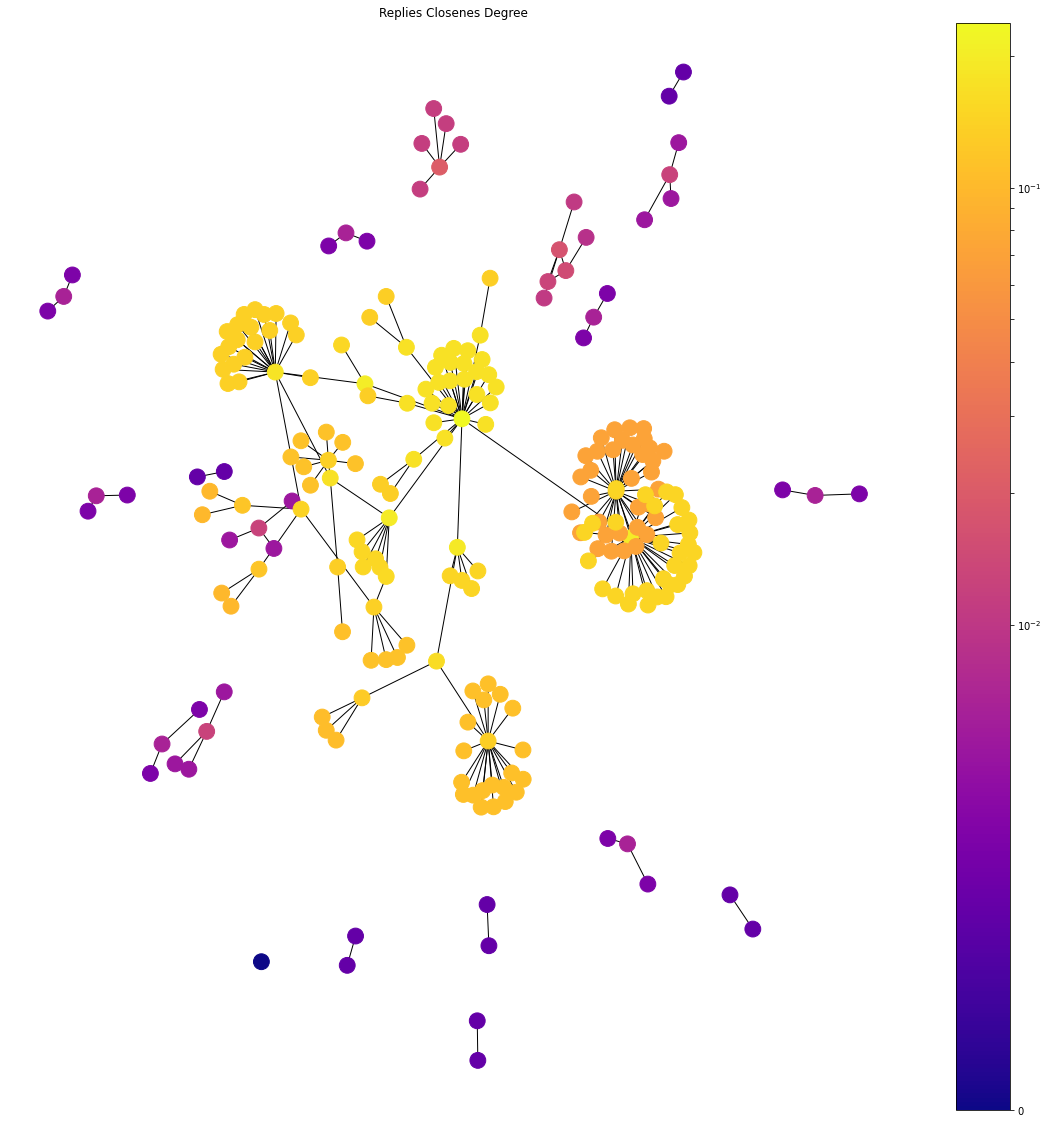

In [82]:
draw(G, nx.spring_layout(G, k=0.05, iterations=20), nx.closeness_centrality(G), 'Replies Closenes Degree', './infojakarta/before_replies.png')

In [83]:
df_after = pd.read_json('./infojakarta/after_replies.json')
after_scrap = pd.read_json('./infojakarta/after_user_scrap.json')

after = pd.concat([df_after, after_scrap])
after = after.drop_duplicates(subset='link')
after

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
0,1403930115579334662,1403906508132274176,106038219,infojakarta,@InfoJakarta,Vaksin Covid-19 untuk Pra-Lansia (50+) https...,1,1,0,[],[],https://twitter.com/infojakarta/status/1403930...,False,,,,,[],"[@infojakarta, @infojakarta, @kleonygeertruid]"
1,1403907579227475973,1403747846403215360,106038219,infojakarta,@InfoJakarta,"@AbiNovian Semakin banyak orang divaksin, sema...",1,0,0,[],[],https://twitter.com/infojakarta/status/1403907...,False,,,,,"[{'screen_name': 'AbiNovian', 'name': 'Abi Nov...","[@infojakarta, @AbiNovian, @infojakarta, @AbiN..."
2,1398237690433130497,1398237690433130496,106038219,infojakarta,@InfoJakarta,Banyak rumor mengenai bahaya vaksin. Hei kalia...,49,7,18,[],[],https://twitter.com/infojakarta/status/1398237...,False,,,,,[],"[@BagusOfficial23, @NnrsnL, @KiloanSusahNaek, ..."
3,1384215782289141767,1384215782289141760,106038219,infojakarta,@InfoJakarta,Gratis vaksin non lansia ...? Kan memang vaks...,3,5,2,[],[],https://twitter.com/infojakarta/status/1384215...,False,https://twitter.com/dinkesJKT/status/138209661...,,,,[],"[@infojakarta, @dinkesJKT, @eckaNh57]"
4,1376929493814677504,1376929493814677504,106038219,infojakarta,@InfoJakarta,"Kurang lebihnya. Sembilan orang ditest, satu ...",3,0,1,[],[],https://twitter.com/infojakarta/status/1376929...,False,https://twitter.com/DKIJakarta/status/13768936...,,,,[],"[@infojakarta, @DKIJakarta, @melwth_, @melanie..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1356457112243752963,1356457112243752960,166014938,dkijakarta,Pemprov DKI Jakarta,Rasa-rasanya semakin sering mendengar adanya o...,4,4,14,"[jagajakarta, covid19, jakartatanggapcorona, h...",[],https://twitter.com/DKIJakarta/status/13564571...,False,,,,,[],"[@DKIJakarta, @Parulian12Roby, @TasKreseks, @D..."
391,1356244812110979082,1356225896819126272,166014938,dkijakarta,Pemprov DKI Jakarta,"@Noer46310158 Terkait persyaratan perjalanan, ...",0,0,0,[],[],https://twitter.com/DKIJakarta/status/13562448...,False,,,,,"[{'screen_name': 'Noer46310158', 'name': 'Noer...","[@aniesbaswedan, @Noer46310158, @DKIJakarta]"
392,1399951594263781379,1399744986279600128,1098446143824879616,graciatbg,Gracia Emmanuella🐷,"@annanurs Iya naaa, vaksin pertama masi kuat b...",0,0,0,[],[],https://twitter.com/graciatbg/status/139995159...,False,,,,,"[{'screen_name': 'annanurs', 'name': 'siapa ak...","[@graciatbg, @graciatbg]"
393,1399744986279600132,1399744986279600128,1098446143824879616,graciatbg,Gracia Emmanuella🐷,Vaksin kedua ini berefek sekali ternyata..,2,0,0,[],[],https://twitter.com/graciatbg/status/139974498...,False,,,,,[],"[@graciatbg, @graciatbg, @graciatbg]"


In [85]:
for i,row in after.iterrows():
    if len(row['list_replies'])<3:
        after = after.drop(i)
    else:
        continue
        
after

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
1,1403907579227475973,1403747846403215360,106038219,infojakarta,@InfoJakarta,"@AbiNovian Semakin banyak orang divaksin, sema...",1,0,0,[],[],https://twitter.com/infojakarta/status/1403907...,False,,,,,"[{'screen_name': 'AbiNovian', 'name': 'Abi Nov...","[@infojakarta, @AbiNovian, @infojakarta, @AbiN..."
12,1393711819387113477,1393711819387113472,106038219,infojakarta,@InfoJakarta,Mulai Hari ini... Siapkan Surat Keterangan Beb...,9,12,31,[],[],https://twitter.com/infojakarta/status/1393711...,False,,,,,[],"[@infojakarta, @amirudin291, @kokohbucin, @edy..."
1,1391569845146120192,1391404045772877824,82836491,nzorock,LondoGosong 🇲🇨,@SoeShilo @Paltiwest Tidak ada yg lucu. Semua ...,0,0,13,[],[],https://twitter.com/nzorock/status/13915698451...,False,,,,,"[{'screen_name': 'SoeShilo', 'name': 'shilo', ...","[@Paltiwest, @SoeShilo, @nzorock]"
12,1395021764355366914,1395021764355366912,942558493604638720,dinkesjkt,Dinas Kesehatan Provinsi DKI Jakarta,Jakarta Memanggil! Pemerintah Provinsi DKI Ja...,3,52,127,[],[],https://twitter.com/dinkesJKT/status/139502176...,False,,,,,[],"[@dinkesJKT, @BonSiapa, @ballambinlove, @asrav..."
18,1382096614895071233,1382096614895071232,942558493604638720,dinkesjkt,Dinas Kesehatan Provinsi DKI Jakarta,"Yuk bersama sukseskan #VaksinasiCovid19! ""Baw...",13,33,94,"[vaksinasicovid19, sukseskanvaksinasi, vaksina...",[],https://twitter.com/dinkesJKT/status/138209661...,False,,,,,[],"[@dinkesJKT, @PecintaSrundeng, @missflorenceli..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1359392476033785856,1359392445058846720,166014938,dkijakarta,Pemprov DKI Jakarta,"Yuk, jalankan pembatasan sosial ini secara ser...",1,7,21,"[jagajakarta, jakartatanggapcorona, hadapibers...",[],https://twitter.com/DKIJakarta/status/13593924...,False,,,,,[],"[@DKIJakarta, @DKIJakarta, @DKIJakarta]"
386,1357572876807774209,1357572876807774208,166014938,dkijakarta,Pemprov DKI Jakarta,"Terus bertambah, 81.064 tenaga kesehatan (nake...",8,31,183,"[vaksinasimassal, vaksinasinakes, vaksinasicov...",[],https://twitter.com/DKIJakarta/status/13575728...,False,,,,,[],"[@DKIJakarta, @matabicara, @iqbaalliqbaall, @B..."
390,1356457112243752963,1356457112243752960,166014938,dkijakarta,Pemprov DKI Jakarta,Rasa-rasanya semakin sering mendengar adanya o...,4,4,14,"[jagajakarta, covid19, jakartatanggapcorona, h...",[],https://twitter.com/DKIJakarta/status/13564571...,False,,,,,[],"[@DKIJakarta, @Parulian12Roby, @TasKreseks, @D..."
391,1356244812110979082,1356225896819126272,166014938,dkijakarta,Pemprov DKI Jakarta,"@Noer46310158 Terkait persyaratan perjalanan, ...",0,0,0,[],[],https://twitter.com/DKIJakarta/status/13562448...,False,,,,,"[{'screen_name': 'Noer46310158', 'name': 'Noer...","[@aniesbaswedan, @Noer46310158, @DKIJakarta]"


In [86]:
# before = before.drop(before[before['username']=='kompastv'].sample(n=800).index)
after['username'].value_counts()

dkijakarta         57
melanieppuchino    15
mosidik             9
arie_16             6
cubitski            6
chiko_jubilee       5
selvianas           3
nofrizalwardoyo     3
dinkesjkt           3
infojakarta         2
hasratmuliadi       2
lalaahmad           2
hunter_rico         2
glowtweets          2
nrmltzns            2
liafrila            2
gendar_pecell       1
ururleahcim         1
herireh             1
lixxone             1
abinovian           1
iamcakekhe          1
rifky_asr13         1
nzorock             1
nnrsnl              1
om_patilele         1
graciatbg           1
listyo_gembong      1
riyanmuharam        1
siswandibambang     1
kokohbucin          1
shinta_p            1
Name: username, dtype: int64

In [88]:
H = nx.Graph()
for i,row in after.iterrows():
    for rep in row['list_replies']:
        print(str.lower(row['username']), str.lower(rep[1:]))
        H.add_edge(str.lower(row['username']), str.lower(rep[1:]))

infojakarta infojakarta
infojakarta abinovian
infojakarta infojakarta
infojakarta abinovian
infojakarta infojakarta
infojakarta amirudin291
infojakarta kokohbucin
infojakarta edychayadi
infojakarta nokirnoz
infojakarta rifky_asr13
infojakarta nzorock
infojakarta siswandibambang
nzorock paltiwest
nzorock soeshilo
nzorock nzorock
dinkesjkt dinkesjkt
dinkesjkt bonsiapa
dinkesjkt ballambinlove
dinkesjkt asravers
dinkesjkt dinkesjkt
dinkesjkt pecintasrundeng
dinkesjkt missflorenceli
dinkesjkt mieke94447043
dinkesjkt bahasa_hanief
dinkesjkt fantasidedi
dinkesjkt mieke94447043
dinkesjkt dinkesjkt
dinkesjkt bobykaa
dinkesjkt fiiambitchious
ururleahcim sylvkartika
ururleahcim firdzaradiany
ururleahcim ururleahcim
om_patilele om_patilele
om_patilele dkijakarta
om_patilele om_patilele
riyanmuharam infojakarta
riyanmuharam hunter_rico
riyanmuharam riyanmuharam
mosidik mosidik
mosidik kikiiiiiiii_
mosidik prfmnews
mosidik dustinyohanes
mosidik saidalzou
mosidik saidalzou
mosidik ismanhs
mosidik roi

In [89]:
closenes = nx.closeness_centrality(H)
closenes = dict(sorted((value, key) for (key,value) in closenes.items())) 
closenes

{0.0: 'nnrsnl',
 0.0031746031746031746: 'tikaalmira',
 0.004232804232804232: 'vivacoid',
 0.005714285714285714: 'temponewsroom',
 0.006349206349206349: 'ururleahcim',
 0.007256235827664399: 'toekangkuliner',
 0.009523809523809525: 'glowtweets',
 0.012698412698412698: 'nrmltzns',
 0.01670843776106934: 'pecintasrundeng',
 0.018291761148904007: 'tuturanku',
 0.031746031746031744: 'dinkesjkt',
 0.03492063492063492: 'cubitski',
 0.06588281403096219: 'yudi__hadianto',
 0.13015873015873017: 'mosidik',
 0.13959876127642384: 'triadibagus',
 0.13973045822102426: 'aewin86',
 0.13986240388506677: 'soeshilo',
 0.14282959085273456: 'znovietha22',
 0.14592540464461648: 'wasim_achmad',
 0.15067577387007702: 'tirta_hudhi',
 0.15144609991235758: 'syushitei',
 0.17466307277628032: 'nokirnoz',
 0.17507598784194528: 'riyanmuharam',
 0.17528317836010143: 'hunter_rico',
 0.17549085985104942: 'nzorock',
 0.18018769551616268: 'melanieppuchino',
 0.18514285714285716: 'arie_16',
 0.1896469727455643: 'veghievenus

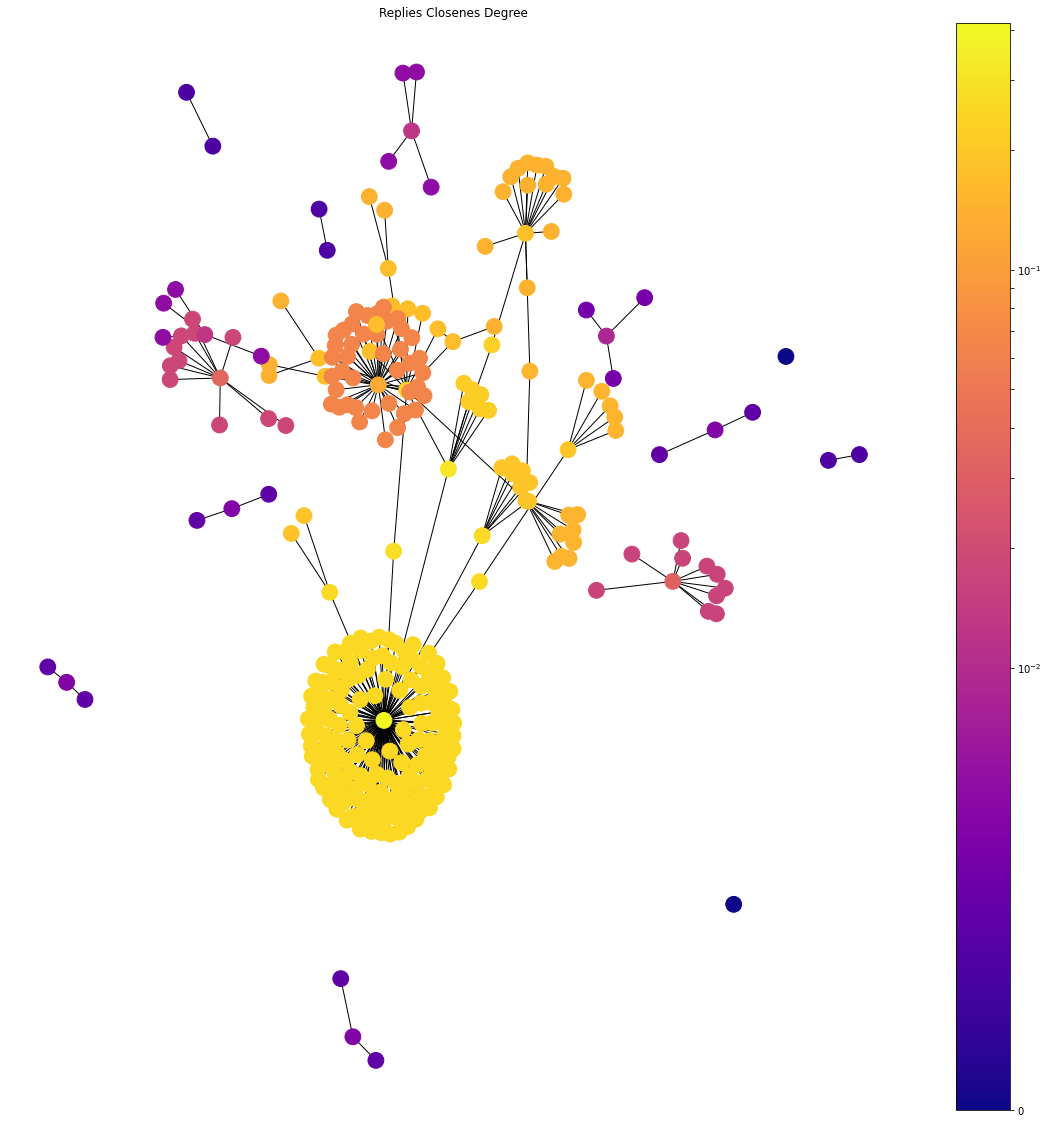

In [90]:
draw(H, nx.spring_layout(H, k=0.05, iterations=20), nx.closeness_centrality(H), 'Replies Closenes Degree', './infojakarta/after_replies.png')

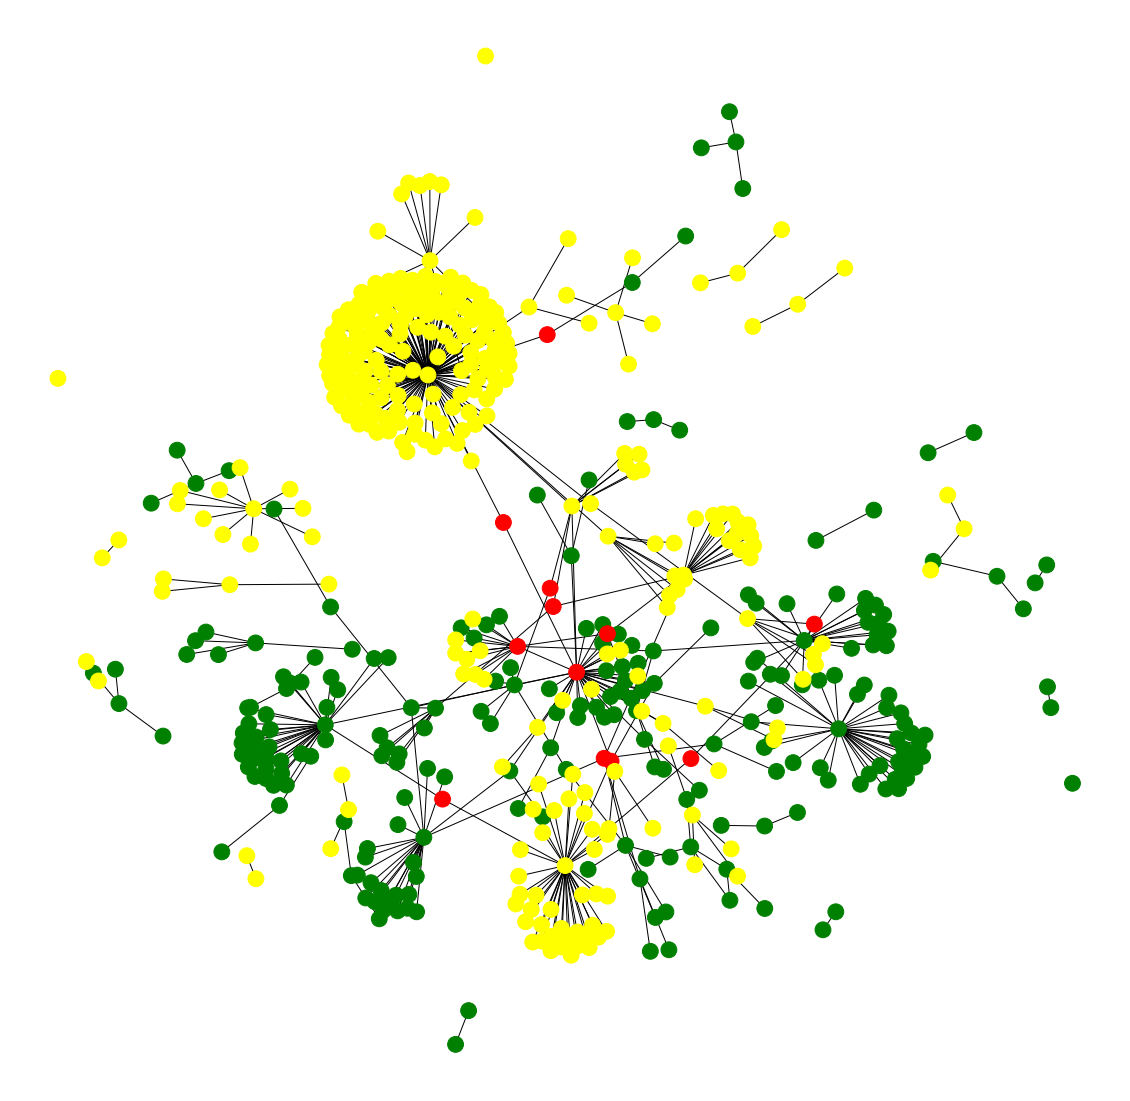

In [91]:
F = nx.compose(G,H)
draw_noHeatMap(G,H)

{'infojakarta': 42, 'arie_16': 17, 'krishnayana95': 4, 'roy78356844': 1, 'rakaadtya21': 10, 'a_neko248': 1, 'ninanenen': 34, 'andinitiwie': 1, 'faraokha': 1, 'willmana8': 1, 'iqbalfarisy': 1, 'raswitham': 1, 'eru_joo_han': 1, 'e_gabagus': 1, 'peterboloho': 1, 'dwibbg': 1, 'pais_hileud': 1, 'insurgentarmy33': 1, 'septiaraenii': 1, 'rachmasakinah': 1, 'jenengkuroi': 1, 'riyo109': 5, 'naana1704': 1, 'syaiful12258759': 1, 'siswandibambang': 4, 'loker_kesehatan': 1, 'dedeham_': 4, 'inter_id': 1, 'hendrabalink': 1, 'meuthiaariefia1': 5, 'aniipuspita': 1, 'fahrifary': 1, 'selasapagi_': 1, 'aisahnh15': 4, 'sociotalker': 1, 'catrescuedotid': 1, 'arielutte11': 3, 'chndyfny': 1, 'fourryilly': 3, 'gemaala': 1, 'augustbudyanto': 2, 'wicaksono_sini': 5, 'nyit_2': 1, 'alexandrapinaka': 1, 'bimbaaiueooooo': 1, 'riskawindayln': 5, 'rahadianmunawir': 1, 'bangopang_': 25, 'christofer_bhp': 10, 'detikcom': 3, 'johndupe5': 1, 'bejokemoyo': 1, 'cnnindonesia': 4, 'laz_antiroma': 1, 'pbidi': 1, 'tempodotco': 

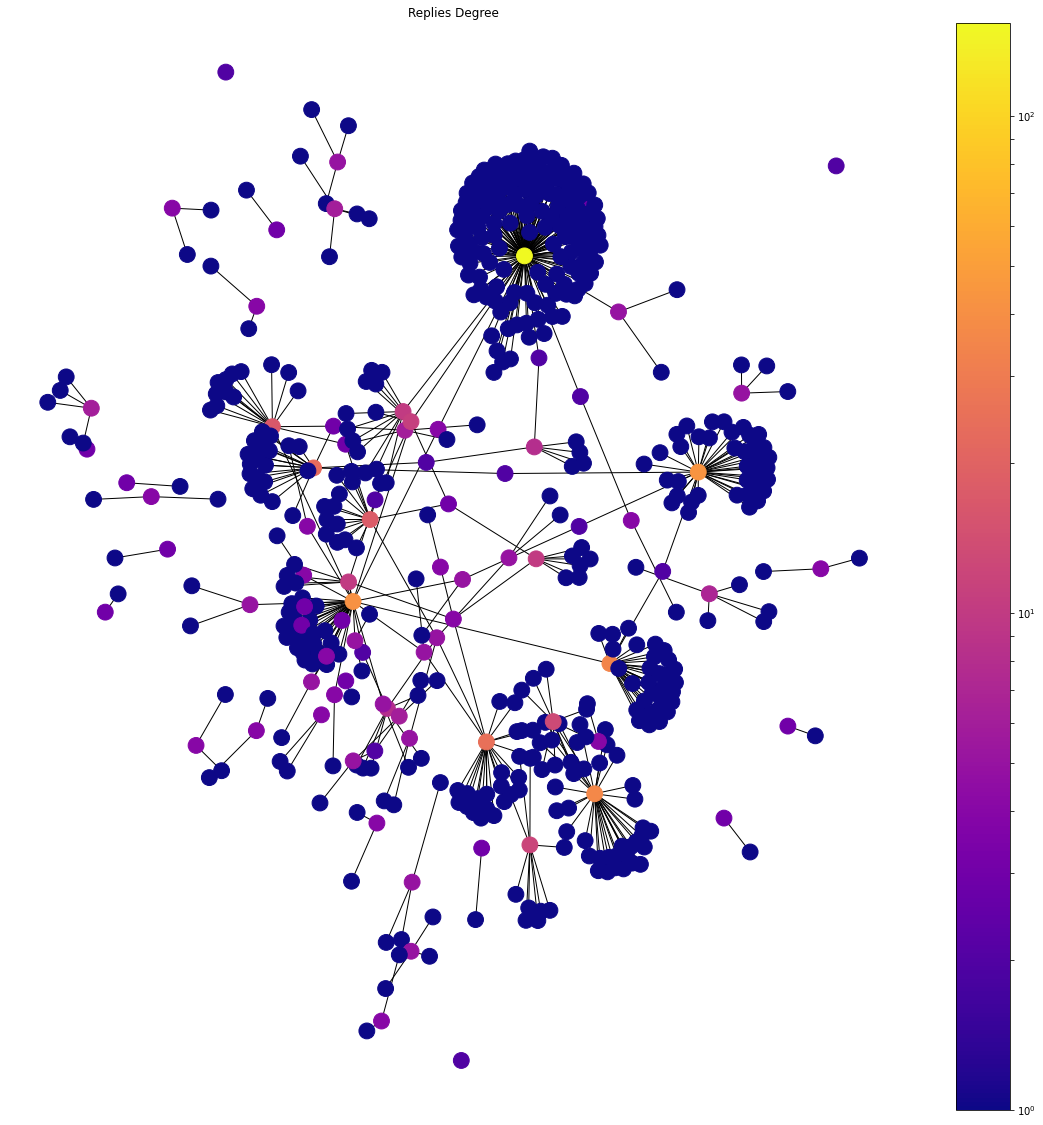

In [92]:
key = [node for (node, val) in F.degree()]
value = [val for (node, val) in F.degree()]
deg = dict(zip(key,value))
print(deg)
draw(F, nx.spring_layout(F, k=0.05, iterations=20), 
     deg, 'Replies Degree', './infojakarta/replies_deg.png')

{'infojakarta': 0.25127703943676344, 'arie_16': 0.20217894380362053, 'krishnayana95': 0.1872801722498954, 'roy78356844': 0.18703836440967608, 'rakaadtya21': 0.1958907548820745, 'a_neko248': 0.18703836440967608, 'ninanenen': 0.20591501525983527, 'andinitiwie': 0.18703836440967608, 'faraokha': 0.18703836440967608, 'willmana8': 0.18703836440967608, 'iqbalfarisy': 0.18703836440967608, 'raswitham': 0.18703836440967608, 'eru_joo_han': 0.18703836440967608, 'e_gabagus': 0.18703836440967608, 'peterboloho': 0.18703836440967608, 'dwibbg': 0.18703836440967608, 'pais_hileud': 0.18703836440967608, 'insurgentarmy33': 0.18703836440967608, 'septiaraenii': 0.18703836440967608, 'rachmasakinah': 0.18703836440967608, 'jenengkuroi': 0.18703836440967608, 'riyo109': 0.19776274844408753, 'naana1704': 0.18703836440967608, 'syaiful12258759': 0.18703836440967608, 'siswandibambang': 0.2386510926446361, 'loker_kesehatan': 0.18703836440967608, 'dedeham_': 0.003676470588235294, 'inter_id': 0.0024509803921568627, 'hen

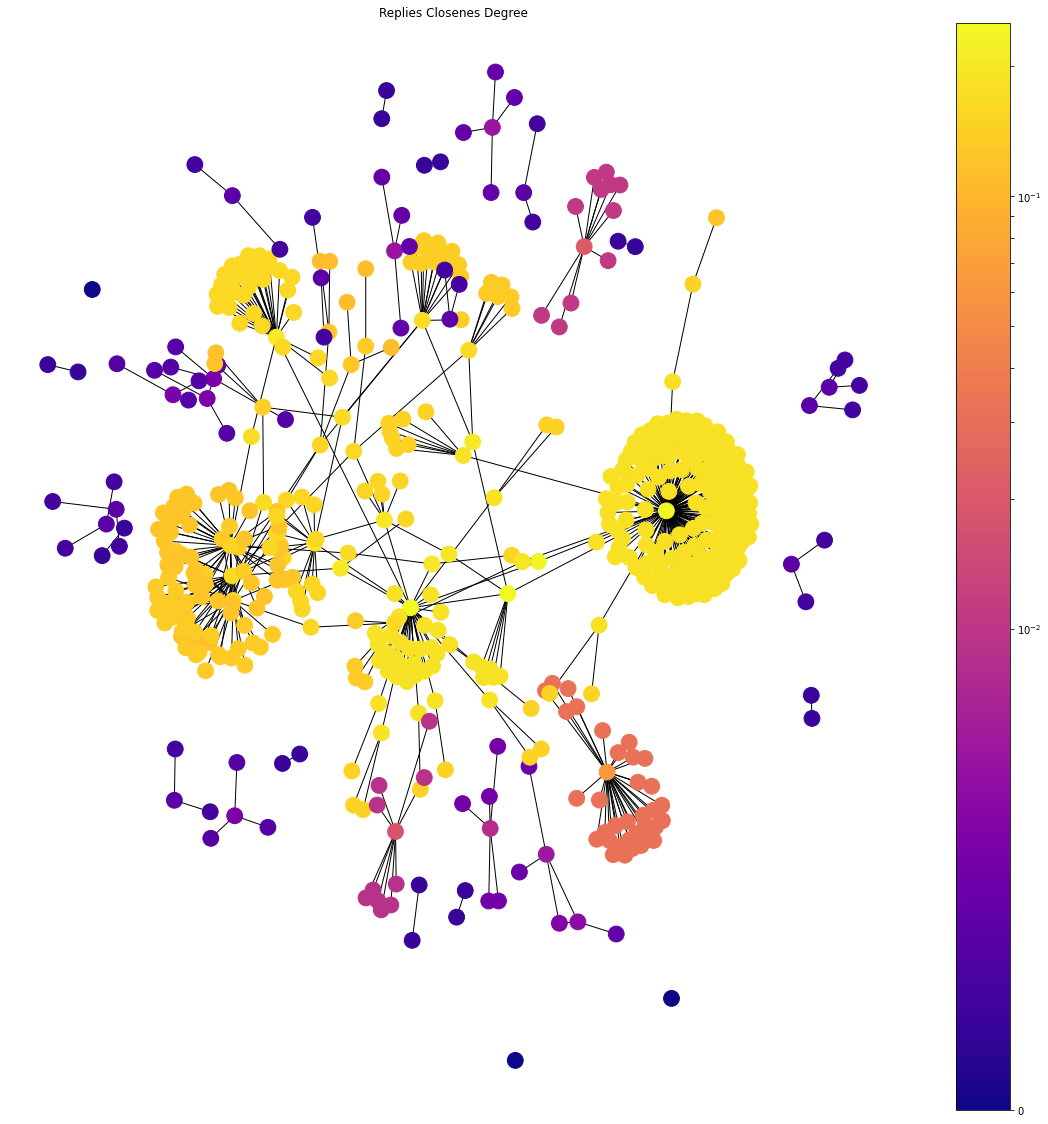

In [93]:
closenes = nx.closeness_centrality(F)
print(closenes)
draw(F, nx.spring_layout(F, k=0.05, iterations=20), 
     closenes, 'Replies Closenes Degree', './infojakarta/replies_closenes.png')

{'infojakarta': 0.30329234824684886, 'arie_16': 0.06209313951178972, 'krishnayana95': 0.002681182970425739, 'roy78356844': 0.0, 'rakaadtya21': 0.031938858646589394, 'a_neko248': 0.0, 'ninanenen': 0.11714399848337115, 'andinitiwie': 0.0, 'faraokha': 0.0, 'willmana8': 0.0, 'iqbalfarisy': 0.0, 'raswitham': 0.0, 'eru_joo_han': 0.0, 'e_gabagus': 0.0, 'peterboloho': 0.0, 'dwibbg': 0.0, 'pais_hileud': 0.0, 'insurgentarmy33': 0.0, 'septiaraenii': 0.0, 'rachmasakinah': 0.0, 'jenengkuroi': 0.0, 'riyo109': 0.04243310583902071, 'naana1704': 0.0, 'syaiful12258759': 0.0, 'siswandibambang': 0.09275945184703689, 'loker_kesehatan': 0.0, 'dedeham_': 6.770664066731665e-06, 'inter_id': 0.0, 'hendrabalink': 0.0, 'meuthiaariefia1': 2.0311992200194993e-05, 'aniipuspita': 0.0, 'fahrifary': 0.0, 'selasapagi_': 0.0, 'aisahnh15': 6.770664066731665e-06, 'sociotalker': 0.0, 'catrescuedotid': 0.0, 'arielutte11': 0.0, 'chndyfny': 0.0, 'fourryilly': 0.0, 'gemaala': 0.0, 'augustbudyanto': 0.0, 'wicaksono_sini': 2.0311

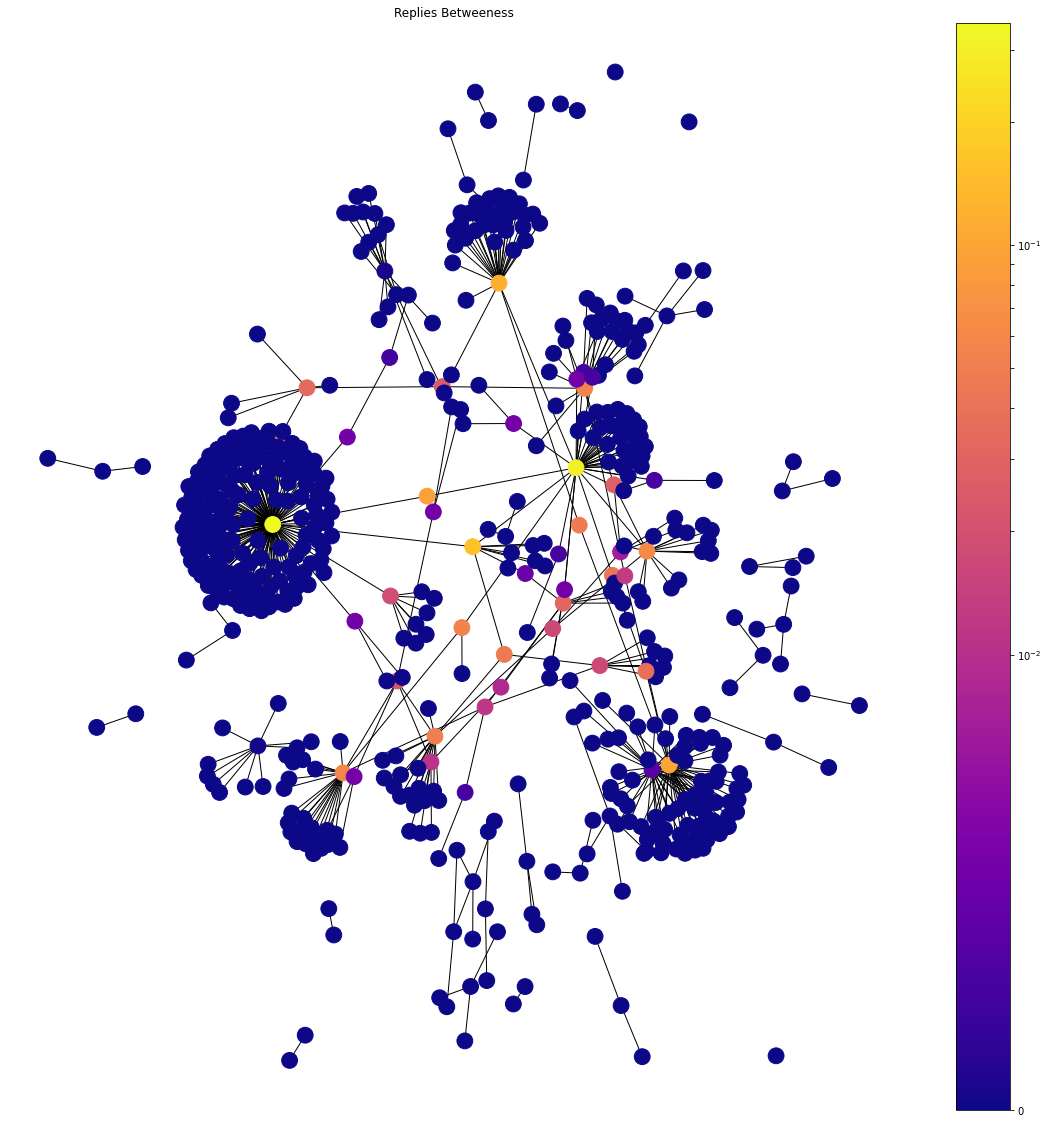

In [98]:
between = nx.betweenness_centrality(F)
print(between)
draw(F, nx.spring_layout(F, k=0.05, iterations=20), 
     between, 'Replies Betweeness', './infojakarta/replies_between.png')

In [100]:
eigen = nx.eigenvector_centrality(F)
eigen = dict(sorted((value, key) for (key,value) in eigen.items()))
eigen

{7.409739709985717e-38: 'nnrsnl',
 5.7273383230245195e-33: 'tikaalmira',
 9.267028071723498e-33: 'sirharriss',
 1.8434689736619997e-30: 'vivacoid',
 3.6869379473239994e-30: 'ururleahcim',
 1.1030449332872432e-28: 'temponewsroom',
 2.540064999697577e-28: 'wicaksono_sini',
 2.749702488392319e-27: 'toekangkuliner',
 7.043508143528783e-27: 'nrmltzns',
 3.9631338860267555e-26: 'sammigismar',
 1.1062247453994428e-25: 'lambe_trah',
 1.0073181005517617e-24: 'bhatigol',
 1.1366769480186065e-24: 'faktasepakbola',
 2.143995048570368e-24: 'jembutatasmulut',
 3.1513131491221294e-24: 'yusamhr',
 3.556001833613848e-24: 'rizky_gendon',
 3.925725504248889e-22: 'pecintasrundeng',
 1.4531316815006613e-21: 'dinkesjkt',
 1.539971083279324e-21: 'tuturanku',
 5.935205580034501e-21: 'cubitski',
 8.2492144573444e-14: 'yourmocca',
 5.240189710302291e-13: 'ap_perdana',
 3.401255447727561e-07: 'mahayu_k',
 1.2110213264806533e-06: 'caturmaull',
 1.2617107277188114e-06: 'rudibhisma',
 1.6996405666322425e-06: 'sanda

{'infojakarta': 0.01455832613774878, 'arie_16': 0.0013552963966117072, 'krishnayana95': 0.0012352382834227996, 'roy78356844': 0.001131740974449978, 'rakaadtya21': 0.001736530661039728, 'a_neko248': 0.001131740974449978, 'ninanenen': 0.0015401962483870847, 'andinitiwie': 0.001131740974449978, 'faraokha': 0.001131740974449978, 'willmana8': 0.001131740974449978, 'iqbalfarisy': 0.001131740974449978, 'raswitham': 0.001131740974449978, 'eru_joo_han': 0.001131740974449978, 'e_gabagus': 0.001131740974449978, 'peterboloho': 0.001131740974449978, 'dwibbg': 0.001131740974449978, 'pais_hileud': 0.001131740974449978, 'insurgentarmy33': 0.001131740974449978, 'septiaraenii': 0.001131740974449978, 'rachmasakinah': 0.001131740974449978, 'jenengkuroi': 0.001131740974449978, 'riyo109': 0.0012436089550124272, 'naana1704': 0.001131740974449978, 'syaiful12258759': 0.001131740974449978, 'siswandibambang': 0.06193864619060132, 'loker_kesehatan': 0.001131740974449978, 'dedeham_': 3.6869379473239994e-30, 'inter

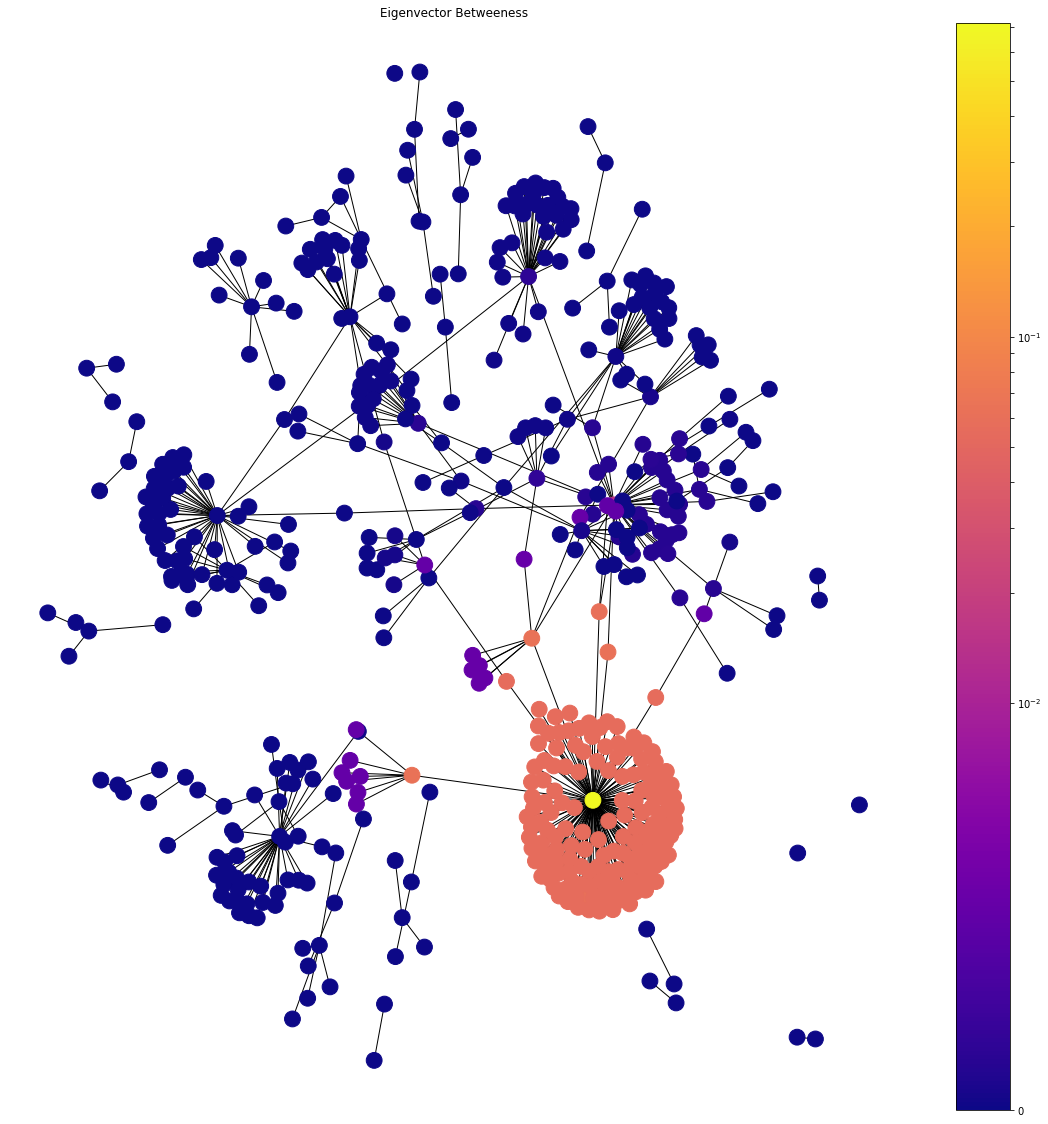

In [101]:
eigenvect = nx.eigenvector_centrality(F)
print(eigenvect)
draw(F, nx.spring_layout(F, k=0.05, iterations=20), 
     eigenvect, 'Eigenvector Betweeness', './infojakarta/replies_eigenvector.png')

###**Ego Graph**

#### Before.json

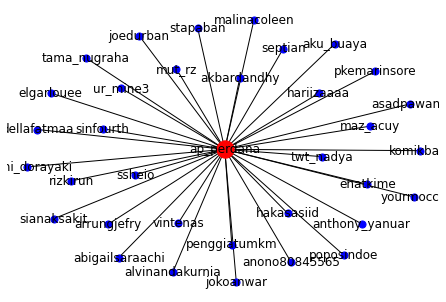

In [115]:
from operator import itemgetter

node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)

# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=True)

# Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.savefig("./infojakarta/ego_before.png", format="PNG")
plt.show()

#### After.json

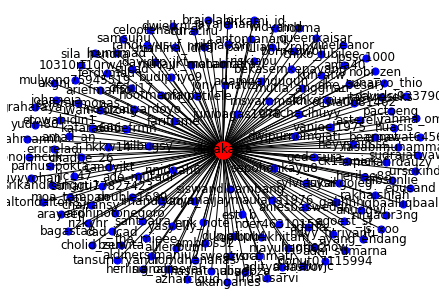

In [114]:
node_and_degree = H.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Create ego graph of main hub
hub_ego = nx.ego_graph(H, largest_hub)

# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=True)

# Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.savefig("./infojakarta/ego_after.png", format="PNG")
plt.show()

### Triad

### Clique

In [103]:
list(nx.find_cliques(G))

[['a_neko248', 'infojakarta'],
 ['yusamhr', 'jembutatasmulut', 'rizky_gendon'],
 ['yusamhr', 'bhatigol'],
 ['mrshananto', 'ninanenen'],
 ['jackanw07', 'ninanenen'],
 ['detikcom', 'christofer_bhp'],
 ['jancuk890', 'withonewithyou'],
 ['beef3yaki', 'ninanenen'],
 ['aisahnh15', 'catrescuedotid'],
 ['aisahnh15', 'sociotalker'],
 ['sanyseptian', 'ferdi_wedhuz'],
 ['satriaoo', 'arie_16'],
 ['sugarsweetnrr', 'ninanenen'],
 ['pais_hileud', 'infojakarta'],
 ['ibnutasrip', 'bangopang_'],
 ['didody', 'ninanenen'],
 ['naana1704', 'infojakarta'],
 ['nyit_2', 'wicaksono_sini'],
 ['kiwcor3', 'abisaapa'],
 ['kiwcor3', 'tirta_hudhi'],
 ['kiwcor3', 'kompastv'],
 ['kiwcor3', 'sandalista1789'],
 ['hendrabalink', 'dedeham_'],
 ['faraokha', 'infojakarta'],
 ['officialjkt48', 'bangopang_'],
 ['drawspeony', 'remajakolonial'],
 ['retoeric', 'ninanenen'],
 ['putrawtf', 'ninanenen'],
 ['dickyxsatrio', 'sirharriss'],
 ['bejokemoyo', 'christofer_bhp'],
 ['okkyjoeamstrong', 'katzen_jammer'],
 ['lookatnju', 'bangopa